## Create non IID dataset with different frequencies

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from lib.generate_timeseries import Periodic_1d
import torch
from collections import Counter
from matplotlib import cm
from torch.distributions import uniform
import pandas as pd
import seaborn as sns
import sys
import json
from flower.task import Net
import glob
import os
os.chdir("/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin")
sys.path.append(os.getcwd()) 
# Ensure seaborn theme
sns.set(style='whitegrid')
from lib.dataset_utils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from plot_utils import read_loss_file,prepare_df_for_plotting
path_prefix = "/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/data"

ModuleNotFoundError: No module named 'flower.lib'

In [15]:
max_freq = 0.1
alpha = 0.0
data_folder = "../data/"
dataset_prefix = f"freq_steps_maxfreq_{max_freq}"
data_files_0 = glob.glob(os.path.join(data_folder, f"{dataset_prefix}/client_0_test.pt"))[0]
data_files_1 = glob.glob(os.path.join(data_folder, f"{dataset_prefix}/client_1_test.pt"))[0]
d_0 = torch.load(data_files_0, weights_only=True)

In [16]:
d_0.shape

torch.Size([100, 100, 1])

## Plot the results

In [46]:
result_json = glob.glob(f"../results_freq_noise/*freq_amp_decay2*/federated_training/**/100_rounds/**/results.json", recursive=True)
len(result_json)

15

In [47]:
df_summary, df_summary_lambdas = prepare_df_for_plotting(result_json, prefix="maxfreq")
# rename alpha to 0 to fedODE and 1 to fedAvg
df_summary_lambdas['aggregation'] = df_summary_lambdas['alpha'].replace({0: 'FedODE', 1: 'FedAvg'})

In [48]:
df_summary_lambdas

,round,maxfreq,lambda,steps,alpha,client,aggregation
0,1,0.1,0.537037,870,0.0,0,FedODE
1,2,0.1,0.446483,876,0.0,0,FedODE
2,3,0.1,0.544419,1434,0.0,0,FedODE
3,4,0.1,0.574349,1854,0.0,0,FedODE
4,5,0.1,0.569659,2208,0.0,0,FedODE
...,...,...,...,...,...,...,...
2995,96,0.3,0.411966,4338,0.0,1,FedODE
2996,97,0.3,0.410331,4242,0.0,1,FedODE
2997,98,0.3,0.421708,4266,0.0,1,FedODE
2998,99,0.3,0.426659,4398,0.0,1,FedODE


df_summary_lambdas

<Figure size 1000x300 with 0 Axes>

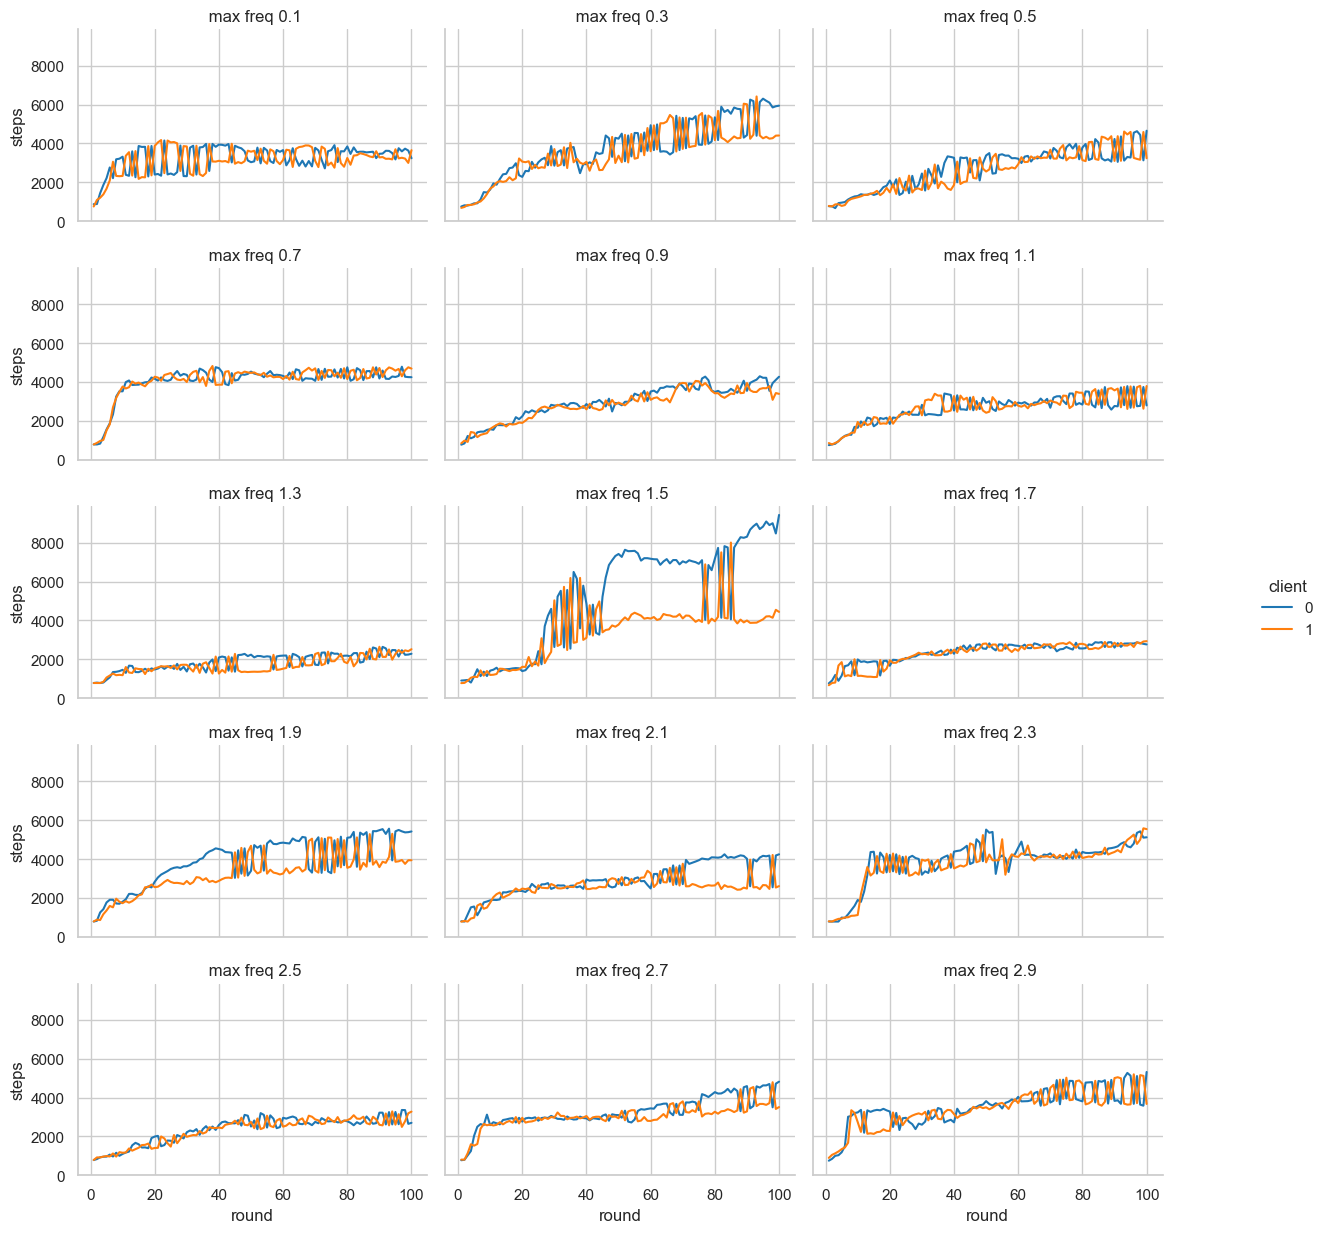

In [50]:
######################################
#  Plot the last loss vs difference
#######################################
plt.figure(figsize=(10, 3))
# Create FacetGrid
g = sns.FacetGrid(
    df_summary_lambdas,
    col="maxfreq",
    height=2.5,
    aspect=1.5,  # Width = height * aspect
    sharey=True,
    col_wrap=3,  # Number of columns in the grid
)

# Map the lineplot onto the grid
g.map_dataframe(
    sns.lineplot,
    x='round',
    y='steps',
    hue='client',
    palette='tab10'
)

# Adjustments
g.set_titles(" max freq {col_name}")
g.set(ylim=(0, None))

# Move legend outside
g.add_legend(title ="client")
g._legend.set_bbox_to_anchor((1.05, 0.5))
# legend 
g._legend.set_loc("center left")
# title
plt.tight_layout()
plt.show()


In [80]:
max_freq = 1.7
alpha = 0.0
data_folder = "../data/"
dataset_prefix = f"freq_amp_decay2_maxfreq_{max_freq}"
os.path.join(data_folder, f"{dataset_prefix}/client_0_test.pt")
glob.glob(os.path.join(data_folder, f"{dataset_prefix}/client_0_test.pt"))

['../data/freq_amp_decay2_maxfreq_1.7/client_0_test.pt']

/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/data/../results_freq_noise/freq_amp_decay2_maxfreq_1.5/federated_training/FedODE/100_rounds/rep_1-alpha_ 0.0-lr_0.001-batchsize_64_clipping_False_lrdecay_1.0_localepochs_10_decayonset_15_alpha_ 0.0/federated_outputs/model.pth
/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/data/../results_freq_noise/freq_amp_decay2_maxfreq_1.5/federated_training/FedODE/100_rounds/rep_1-alpha_ 0.0-lr_0.001-batchsize_64_clipping_False_lrdecay_1.0_localepochs_10_decayonset_15_alpha_ 0.0/federated_outputs/model.pth


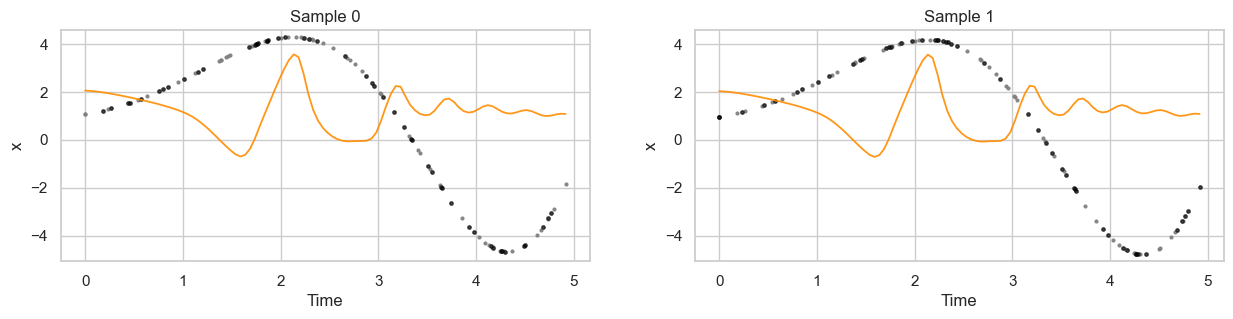

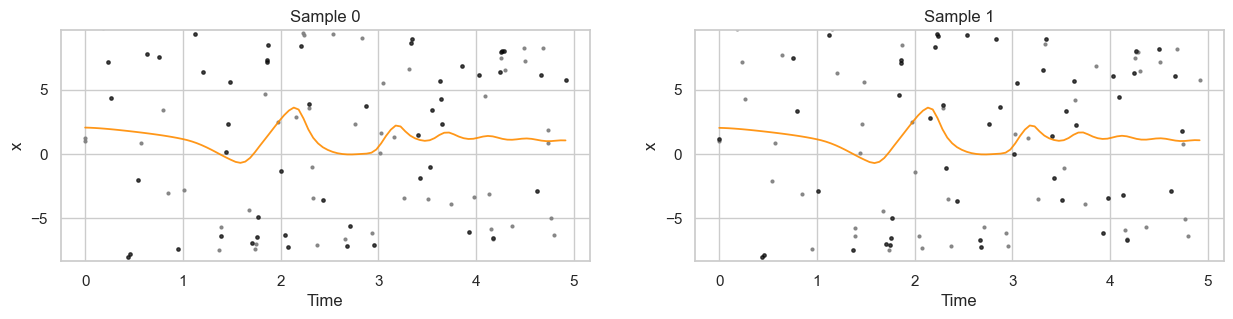

In [84]:
max_freq = 1.5
alpha = 0.0
data_folder = "../data/"
dataset_prefix = f"freq_amp_decay2_maxfreq_{max_freq}"
glob.glob(os.path.join(data_folder, f"{dataset_prefix}/client_0_test.pt"))
data_files_0 = glob.glob(os.path.join(data_folder, f"{dataset_prefix}/client_0_test.pt"))[0]
data_files_1 = glob.glob(os.path.join(data_folder, f"{dataset_prefix}/client_1_test.pt"))[0]
timestamps_0 = glob.glob(os.path.join(data_folder, f"{dataset_prefix}/client_0_time_steps_test.pt"))[0]
timestamps_1 = glob.glob(os.path.join(data_folder, f"{dataset_prefix}/client_1_time_steps_test.pt"))[0]
d_0 = torch.load(data_files_0, weights_only=True)
d_1 = torch.load(data_files_1, weights_only=True)
t_0 = torch.load(timestamps_0, weights_only=True)
t_1 = torch.load(timestamps_1, weights_only=True)
w = glob.glob(os.path.join(path_prefix, f"../results_freq_noise/{dataset_prefix}/**/FedODE/**/model.pth"), recursive=True)
# if alpha_ 0.0 is in the path, then it is FedODE, otherwise it is FedAvg
for file in w:
    print(file)
    if "alpha_ 0.0" in file:
        w_avg = file
    elif "alpha_ 1.0" in file:
        w_ode = file

print(w_avg)
#w_ode = glob.glob(os.path.join(path_prefix, f"../results_freq_noise/{dataset_prefix}/**/FedODE/**/model.pth"), recursive=True)[1]

model = Net()
model.load_state_dict(torch.load(w_avg, weights_only=True))
plot_n_outputs(model, d_0, t_0[0], n = 2 )
plot_n_outputs(model, d_1, t_1[0], n = 2 )
